# Cupoy官網新聞

## 專案目標

請任選 Cupoy 新聞服務之某一種分類 (如熱門新聞、科技、商業....)，使用你學習過的爬蟲程式，爬取前 500 篇的文章：

https://www.cupoy.com/newsfeed/topstory

In [2]:
#載入套件
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep

In [3]:
#指定網址
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  

用Selenium打開一個瀏覽器，連結到網站，然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

In [4]:
#使用webdriver.Chrime()建立Google Chrime瀏覽器物件
browser = webdriver.Chrome()
#以get()方法連結到指定網址
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy網頁

SCROLL_PAUSE_TIME = 1

# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#通過左邊控制橫向和縱向滾動條scrollTo(x, y）
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    time.sleep(3) #是Python程序暫停執行3秒
    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print('到達網頁頁面底端')
        break
    print('網頁正在更新中...，請稍後')
    last_height = new_height

網頁正在更新中...，請稍後
網頁正在更新中...，請稍後
到達網頁頁面底端


# 網頁已經更新完畢，所有資料皆已出現在都已出現在網頁。

In [5]:
count = 1
total_count = 500
#建立空的串列(list)
updatetime_list = []
category_list = []
liveness_list = []
title_list = []
content_list = []
href_list = []
while (count <= total_count) :
    html_source = browser.page_source # browser.page_source:網頁原始碼
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        # 文章種類
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        # 文章標題
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa hDLssh').text
        # 文章內容
        content = artical.find('p', class_ = 'sc-FQuPU sc-ciodno bvnzOw').text
        # 文章網址
        href = artical.find("a").get('href')
        # 文章更新時間
        updatetime = artical.find('span').text
        # 防止抓取到重複的文章
        if title not in title_list:
            # 將各種資料存放進串列中(list)
            updatetime_list.append(updatetime)
            category_list.append(category)
            title_list.append(title)
            content_list.append(content)
            href_list.append(href)
            # 計算目前總共已經爬取的文章數量
            count += 1
        # 抓取500篇文章就跳出迴圈
        if count == (total_count + 1):
            break
    
    # 將網頁繼續向下滑
    sleep(3) #暫停執行3秒
    browser.execute_script("window.scrollTo(0, 1000000);") # browser.execute_script():滾動到網頁底部

In [6]:
# 關閉瀏覽器
browser.quit();

In [7]:
# 建立 DataFrame
"""
DataFrame 用來處理結構化(Table like)的資料，
有列索引與欄標籤的二維資料集，
可以透過 Dictionary 或是 Array 來建立。
"""
data = pd.DataFrame([updatetime_list,category_list, title_list, content_list, href_list])
# 確認輸出資料形式
print(data) 
#轉置：df.T
data = data.T

                                                 0    \
0                                             14 小時前   
1                                               蘋果專區   
2            蘋果供應鏈重新賽跑，前有復工壓力、後有中國追兵 | TechNews 科技新報   
3  從中國鄭州到美國紐約，一邊是 iPhone 最重要的生產基地，一邊是重要的市場。今年，這條高...   
4  https://technews.tw/2020/02/22/covid-19-apple-...   

                                                 1    \
0                                             10 小時前   
1                                               資訊安全   
2          Sucuri SiteCheck 免費網站安全檢測，掃描有無惡意程式或被列入黑名單   
3  Sucuri SiteCheck 會掃描網站是否有惡意程式、有無被植入垃圾郵件、有無被污染或...   
4  https://free.com.tw/sucuri-sitecheck/?utm_cont...   

                                                 2    \
0                                              9 小時前   
1                                             AI與大數據   
2  ArXiv Weekly Radiostation：本週NLP、CV、ML精選論文30篇（2...   
3                                                      
4   https://www.jiqizhixin.com/articles/2020-0

# 整理資料排列方式

In [8]:
# 加入每一行(column)的名稱 
columnName = ["文章更新時間","文章種類","文章標題","文章內容","文章網址"]
# 改欄位名稱
data.columns = columnName
data

,文章更新時間,文章種類,文章標題,文章內容,文章網址
0,14 小時前,蘋果專區,蘋果供應鏈重新賽跑，前有復工壓力、後有中國追兵 | TechNews 科技新報,從中國鄭州到美國紐約，一邊是 iPhone 最重要的生產基地，一邊是重要的市場。今年，這條高...,https://technews.tw/2020/02/22/covid-19-apple-...
1,10 小時前,資訊安全,Sucuri SiteCheck 免費網站安全檢測，掃描有無惡意程式或被列入黑名單,Sucuri SiteCheck 會掃描網站是否有惡意程式、有無被植入垃圾郵件、有無被污染或...,https://free.com.tw/sucuri-sitecheck/?utm_cont...
2,9 小時前,AI與大數據,ArXiv Weekly Radiostation：本週NLP、CV、ML精選論文30篇（2...,,https://www.jiqizhixin.com/articles/2020-02-22-6
3,11 小時前,Google專區,Google 相簿的 5 種工作利用，整理簡報圖庫、活動照片更輕鬆 | 經理人,Google 相簿的 5 種工作利用，整理簡報圖庫、活動照片更輕鬆,https://www.managertoday.com.tw/articles/view/...
4,15 小時前,職涯,麗臺整合Nvidia GPU與深度學習軟體套件，新款AI工作站上陣 | iThome,麗臺科技推出新款AI工作站，當中搭配1或2張Nvidia Quadro RTX系列GPU加速...,https://www.ithome.com.tw/review/135842
...,...,...,...,...,...
495,2020/02/07,Fintech金融科技,武漢肺炎疫情衝擊 Apple 中國供應鏈 - INSIDE,華爾街日報認為蘋果可能在這波疫情下大受影響，雖然 iPhone 部分在印度生產，但大多是為了...,https://www.inside.com.tw/article/18847-wuhan-...
496,2020/02/07,Fintech金融科技,矽谷公司如何找人才？三個技巧寫出 AI 偏好的關鍵字履歷 - INSIDE,不管你是在臺灣要尋找外商工作，或是計劃在美國就職都可以適用。切記，履歷只是你在找工作漫漫長路...,https://www.inside.com.tw/article/18841-3-Tips...
497,2020/02/07,Fintech金融科技,研發武漢肺炎疫苗，國衛院：拚 2 個月研發、半年內臨牀試驗 - INSIDE,國衛院力拼 2 個月內研發出疫苗，並同步展開臨牀試驗申請和分包，期望在半年內進入臨牀試驗。 ...,https://www.inside.com.tw/article/18846-2019-n...
498,2020/02/07,AI與大數據,Google釋出用來評估機器學習系統長期影響的工具 | iThome,以靜態資料集來分析機器學習的公平性，無法反應系統在動態環境的真實情況，而ML-fairnes...,https://www.ithome.com.tw/news/135710


In [9]:
# 回傳列數與欄數 
print("資料行數: ",data.shape[0]) 
print("資料列數: ",data.shape[1]) 
print("----------------------------------------------------------------------------------------------------") 
# 回傳欄位名稱
print(data.columns)

資料行數:  500
資料列數:  5
----------------------------------------------------------------------------------------------------
Index(['文章更新時間', '文章種類', '文章標題', '文章內容', '文章網址'], dtype='object')


# 儲存CSV

將爬取到的500筆新聞資料儲存一個.CSV檔案。

In [10]:
# 儲存成 .xlsx
data.to_csv("Cupoy_news.csv", encoding="utf-8")

# 類別分類

In [49]:
import pandas as pd
category_count = {}

for category in category_list:
    #如果該類別不存在，則計算第一次
    if category not in category_count:
        category_count[category] = 1
    #類別存在，則計算數量    
    else:
        category_count[category] += 1

# 類別名稱
labels = list(category_count.keys())
# 類別數量
values = list(category_count.values())
category_count_data = pd.DataFrame(values,index=labels,columns = ["數量"])
print(category_count_data)
print("==========================================================================================================")
#輸出計算結果
print("總共類別數: ", category_count_data.shape[0])
print("==========================================================================================================")
# 回傳欄位名稱
print(category_count_data.columns)      

              數量
蘋果專區          18
資訊安全          18
AI與大數據       184
Google專區      10
職涯             9
區塊鏈技術         23
醫療健康           7
APP應用程式       34
創業             6
電子商務           9
遊戲情報          13
手機平板          15
無人駕駛           3
3C產品          16
行銷             3
社交媒體          10
虛擬實境           5
理財             4
物聯網            3
Fintech金融科技   87
筆電             3
美妝保養           1
趨勢與策略          7
財經             5
相機             2
超級瑪利歐          1
美食             2
籃球             1
旅遊             1
總共類別數:  29
Index(['數量'], dtype='object')


# 數據資料視覺化

## 圓餅圖 

ValueError: too many values to unpack (expected 2)

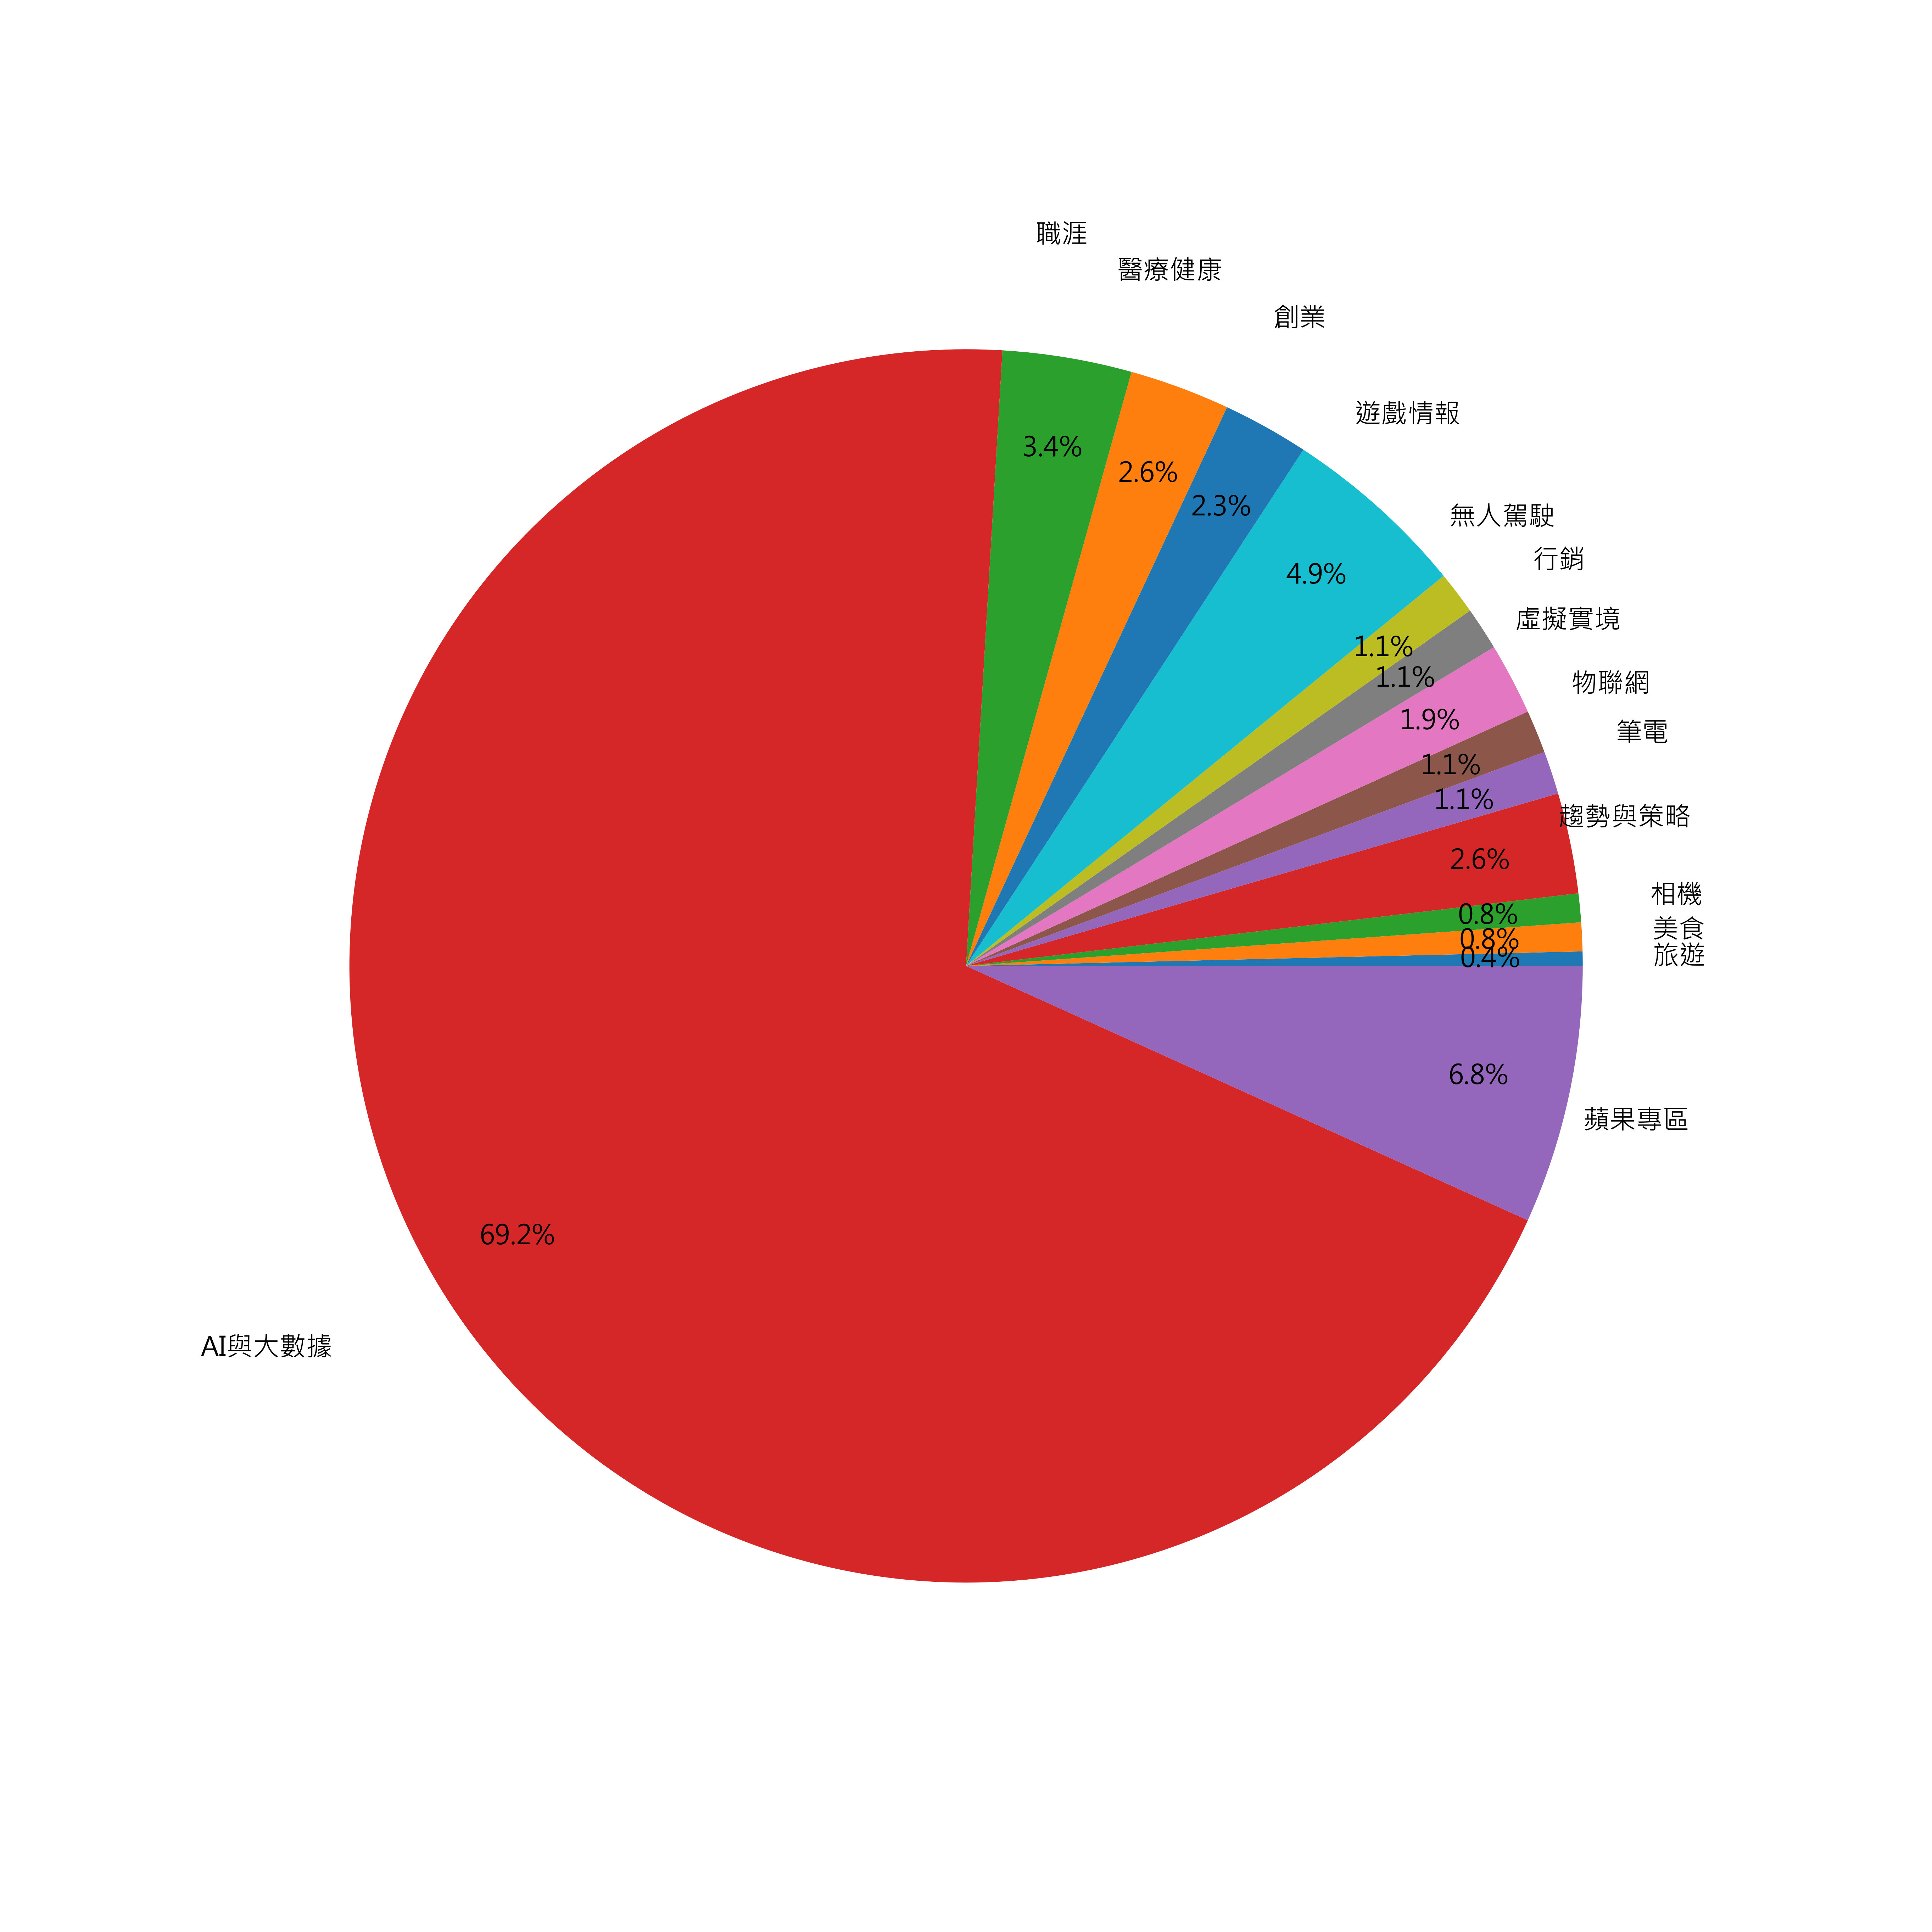

In [36]:
# 載入套件
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties# import字型管理套件

myfont = FontProperties(fname = r"./NotoSansCJK-Black.ttc")

#使用rcParams 參數指定字體
# 中文亂碼的處理，rcParams也可以用於設定圖的解析度，大小等資訊
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

# 設定圓餅圖大小
plt.figure(figsize=(200,100))
#explode = (0,0,0.05,0)
l_text,p_text = plt.pie(values[::-2],
                        labels = labels[::-2], # 分類的標記
                        autopct="%1.1f%%", #数值保留固定小數位
                        shadow=False, # 是否使用陰影
                        labeldistance = 1.2,
                        pctdistance = 0.85, # 數值與圓餅圖的圓心距離
                        radius = 0.8,       # 圓餅圖的半徑，預設是1
                        center = (-50,0),     # 圓餅圖的圓心座標
                        textprops = {"fontsize" : 75}) # 文字大小


#設定劃出正元餅圖
plt.axis("equal")
#設定橫縱座標的名稱以及對應字型格式
font = {'size': 75}
# 設定legnd的位置
plt.legend(loc = "best",prop=font)
plt.savefig("Pie chart of Cupoy_news") # 儲存圖檔
plt.show()


## 直方圖

In [71]:
plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 110
plt.figure(figsize=(300,150))
plt.xlabel('文章類別')
plt.ylabel('文章數量')
plt.title('爬蟲文章數量')
plt.hist(data['文章種類'][::-2],
         bins=20,
         edgecolor='#EFB28C',
         color='#EED19C',
         linewidth=3,
         normed = True, # 設置為頻率直方圖
         cumulative = True) # 累積直方圖
plt.savefig("Bar chart of Cupoy_news", # 儲存圖檔
           bbox_inches='tight',# 去除座標軸占用的空間
            pad_inches=0.0) # 去除所有白邊
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
